In [4]:
from robustbench.data import load_cifar10c
from robustbench.utils import clean_accuracy
from robustbench.utils import load_model


corruptions = ['fog']
x_test, y_test = load_cifar10c(n_examples=1000, corruptions=corruptions, severity=5)

for model_name in ['Standard', 'Engstrom2019Robustness', 'Rice2020Overfitting',
                   'Carmon2019Unlabeled']:
 model = load_model(model_name, dataset='cifar10', threat_model='Linf')
 acc = clean_accuracy(model, x_test, y_test)
 print(f'Model: {model_name}, CIFAR-10-C accuracy: {acc:.1%}')

Download started: path=models/cifar10/Linf/Standard.pt (gdrive_id=1t98aEuzeTL8P7Kpd5DIrCoCL21BNZUhC)
Download finished: path=models/cifar10/Linf/Standard.pt (gdrive_id=1t98aEuzeTL8P7Kpd5DIrCoCL21BNZUhC)
Model: Standard, CIFAR-10-C accuracy: 74.4%
Download started: path=models/cifar10/Linf/Engstrom2019Robustness.pt (gdrive_id=1etqmQsksNIWBvBQ4r8ZFk_3FJlLWr8Rr)
Download finished: path=models/cifar10/Linf/Engstrom2019Robustness.pt (gdrive_id=1etqmQsksNIWBvBQ4r8ZFk_3FJlLWr8Rr)
Model: Engstrom2019Robustness, CIFAR-10-C accuracy: 38.8%
Download started: path=models/cifar10/Linf/Rice2020Overfitting.pt (gdrive_id=1vC_Twazji7lBjeMQvAD9uEQxi9Nx2oG-)
Download finished: path=models/cifar10/Linf/Rice2020Overfitting.pt (gdrive_id=1vC_Twazji7lBjeMQvAD9uEQxi9Nx2oG-)
Model: Rice2020Overfitting, CIFAR-10-C accuracy: 22.0%
Download started: path=models/cifar10/Linf/Carmon2019Unlabeled.pt (gdrive_id=15tUx-gkZMYx7BfEOw1GY5OKC-jECIsPQ)
Download finished: path=models/cifar10/Linf/Carmon2019Unlabeled.pt (gdri

In [20]:
from robustbench.data import load_imagenetc
from robustbench.utils import clean_accuracy
from robustbench.utils import load_model


corruptions = ['fog']
x_test, y_test = load_imagenetc(n_examples=5000, corruptions=corruptions, severity=1, data_dir='/datasets/imagenet-ood')

for model_name in ['Geirhos2018_SIN']:
 model = load_model(model_name, dataset='imagenet')
 model.to(device)
 acc = clean_accuracy(model, x_test, y_test)
 print(f'Model: {model_name}, ImageNet-C accuracy: {acc:.1%}')

KeyboardInterrupt: 

In [22]:
### Working code

import torch 
from robustbench.data import load_imagenetc
from robustbench.utils import clean_accuracy
from robustbench.utils import load_model

device = torch.device("cuda:0")

corruptions = ['fog']
x_test, y_test = load_imagenetc(n_examples=5000, corruptions=corruptions, severity=1, data_dir='/datasets/imagenet-ood')
x_test, y_test = x_test.to(device), y_test.to(device)

for model_name in ['Geirhos2018_SIN_IN']:
 model = load_model(model_name, dataset='imagenet', threat_model='corruptions')
 model.to(device)
 acc = clean_accuracy(model, x_test, y_test, device=device)
 print(f'Model: {model_name}, ImageNet-C accuracy: {acc:.1%}')

Model: Geirhos2018_SIN_IN, ImageNet-C accuracy: 59.5%


In [29]:
### Working code -- all 2D corruptions

import torch 
from robustbench.data import load_imagenetc
from robustbench.utils import clean_accuracy
from robustbench.utils import load_model

corruptions_to_test_2d = ['jpeg_compression', 'pixelate', 'defocus_blur', 'defocus_blur', 'brightness', 'fog', 'jpeg_compression', 'jpeg_compression', 'shot_noise', 'impulse_noise', 'motion_blur', 'zoom_blur']
corruptions_to_test_3d = ['bit_error', 'color_quant', 'near_focus', 'far_focus', 'flash', 'fog_3d', 'h265_abr', 'h265_crf', 'iso_noise', 'low_light', 'xy_motion_blur', 'z_motion_blur']

device = torch.device("cuda:0")

all_corruptions = corruptions_to_test_2d

for corruption in all_corruptions:
    for s in [1,2,3,4,5]:
        corruptions = [corruption]
        x_test, y_test = load_imagenetc(n_examples=5000, corruptions=corruptions, severity=s, data_dir='/datasets/imagenet-ood')
        x_test, y_test = x_test.to(device), y_test.to(device)

        for model_name in ['Geirhos2018_SIN_IN']:
            model = load_model(model_name, dataset='imagenet', threat_model='corruptions')
            model.to(device)
            acc = clean_accuracy(model, x_test, y_test, device=device)
            print(f'Model: {model_name}, ImageNet-C corruption: {corruption} severity: {s} accuracy: {acc:.1%}')

Model: Geirhos2018_SIN_IN, ImageNet-C corruption: jpeg_compression severity: 1 accuracy: 64.1%
Model: Geirhos2018_SIN_IN, ImageNet-C corruption: jpeg_compression severity: 2 accuracy: 61.8%
Model: Geirhos2018_SIN_IN, ImageNet-C corruption: jpeg_compression severity: 3 accuracy: 59.5%


KeyboardInterrupt: 

In [7]:
### Working code -- all 3D corruptions -- save them as pickle files
import pickle as pkl
import torch 
from robustbench.data import load_imagenetc
from robustbench.utils import clean_accuracy
from robustbench.utils import load_model

#corruptions_to_test_2d = ['jpeg_compression', 'pixelate', 'defocus_blur', 'defocus_blur', 'brightness', 'fog', 'jpeg_compression', 'jpeg_compression', 'shot_noise', 'impulse_noise', 'motion_blur', 'zoom_blur']
corruptions_to_test_3d = ['bit_error', 'color_quant', 'near_focus', 'far_focus', 'flash', 'fog_3d', 'h265_abr', 'h265_crf', 'iso_noise', 'low_light', 'xy_motion_blur', 'z_motion_blur']

device = torch.device("cuda:0")

all_corruptions = corruptions_to_test_3d

#for model_name in ['Hendrycks2020Many', 'Hendrycks2020AugMix', 'Geirhos2018_SIN_IN', 'Geirhos2018_SIN_IN_IN', 'Standard_R50', 'Geirhos2018_SIN', 'Salman2020Do_50_2_Linf']:
for model_name in ['Erichson2022NoisyMix']: #['Geirhos2018_SIN_IN', 'Geirhos2018_SIN_IN_IN', 'Standard_R50', 'Geirhos2018_SIN', 'Salman2020Do_50_2_Linf']:    
    corrs_all = {}
    model = load_model(model_name, dataset='imagenet', threat_model='corruptions')
    model.to(device)
    for corruption in all_corruptions:
        corrs_curr = []
        for s in [1,2,3,4,5]:
            corruptions = [corruption]
            x_test, y_test = load_imagenetc(n_examples=5000, corruptions=corruptions, severity=s, data_dir='/datasets/home/oguzhan/release_3dcc/3dcc_data')
            x_test, y_test = x_test.to(device), y_test.to(device)
        
            acc = clean_accuracy(model, x_test, y_test, device=device)
            print(f'Model: {model_name}, ImageNet-C corruption: {corruption} severity: {s} accuracy: {acc:.1%}')
            corrs_curr.append(acc)
        corrs_all[corruption] = corrs_curr
        pkl.dump(corrs_all,open(f'eval_3dcc_{model_name}.pkl','wb'))
            
    

KeyError: 'Erichson2022NoisyMix'

In [19]:
print(y_test.device)
print(x_test.device)

cuda:0
cuda:0


In [3]:
aa = pkl.load(open('eval_3dcc_Geirhos2018_SIN_IN.pkl','rb'))

In [4]:
print(aa)

{'bit_error': [0.4, 0.2, 0.2, 0.2, 0.2], 'color_quant': [0.6, 0.6, 0.6, 0.4, 0.0], 'near_focus': [0.6, 0.6, 0.4, 0.4, 0.4], 'far_focus': [0.4, 0.6, 0.4, 0.4, 0.4], 'flash': [0.6, 0.6, 0.6, 0.6, 0.6], 'fog_3d': [0.4, 0.2, 0.2, 0.0, 0.0], 'h265_abr': [0.6, 0.6, 0.4, 0.4, 0.4], 'h265_crf': [0.6, 0.4, 0.4, 0.4, 0.4], 'iso_noise': [0.4, 0.2, 0.2, 0.4, 0.2], 'low_light': [0.4, 0.6, 0.6, 0.6, 0.6], 'xy_motion_blur': [0.4, 0.4, 0.2, 0.2, 0.2], 'z_motion_blur': [0.4, 0.2, 0.4, 0.4, 0.4]}


['z_motion_blur']
torch.Size([6, 3, 224, 224])


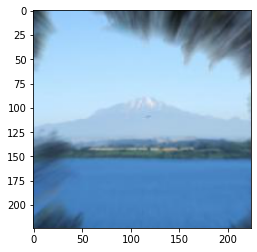

In [6]:
# compute robust accuracies
import pickle as pkl
import numpy as np 

models = ['Hendrycks2020Many', 'Hendrycks2020AugMix', 'Geirhos2018_SIN_IN', 'Geirhos2018_SIN_IN_IN', 'Standard_R50', 'Geirhos2018_SIN', 'Salman2020Do_50_2_Linf']
corruptions_3d = ['bit_error', 'color_quant', 'near_focus', 'far_focus', 'flash', 'fog_3d', 'h265_abr', 'h265_crf', 'iso_noise', 'low_light', 'xy_motion_blur', 'z_motion_blur']
for model in models:
    corrs_curr = pkl.load(open(f'eval_3dcc_{model}.pkl','rb'))
    corrs_curr_avg = []
    for corruption in corruptions_3d:
        corrs_curr_avg.append(np.mean(np.array(corrs_curr[corruption])))
    print(model)
    print(corrs_curr_avg)
    print(np.mean(np.array(corrs_curr_avg)))

Hendrycks2020Many
[0.4911600000000001, 0.6168799999999999, 0.6424, 0.5818800000000001, 0.47328000000000003, 0.47416, 0.683, 0.7240400000000001, 0.59276, 0.5456000000000001, 0.39208, 0.39444]
0.5509733333333334
Hendrycks2020AugMix
[0.48272000000000004, 0.59672, 0.61832, 0.56324, 0.39276, 0.4591200000000001, 0.66256, 0.7106000000000001, 0.41475999999999996, 0.48724, 0.40275999999999995, 0.42424]
0.51792
Geirhos2018_SIN_IN
[0.45583999999999997, 0.57016, 0.58592, 0.5360400000000001, 0.40596000000000004, 0.42644000000000004, 0.61808, 0.6684800000000001, 0.45104, 0.47783999999999993, 0.35860000000000003, 0.34687999999999997]
0.49177333333333334
Geirhos2018_SIN_IN_IN
[0.46719999999999995, 0.56112, 0.5947600000000001, 0.5424, 0.38916, 0.42244000000000004, 0.62632, 0.6854799999999999, 0.33352, 0.46003999999999995, 0.327, 0.35856]
0.48066666666666674
Standard_R50
[0.4534000000000001, 0.54172, 0.5644, 0.5242, 0.35972000000000004, 0.4042, 0.61348, 0.6659599999999999, 0.28564, 0.41924, 0.3044, 0.35

In [2]:
# robustbench fork version

import pickle as pkl
import torch 
from robustbench.data import load_imagenet3dcc
from robustbench.utils import clean_accuracy
from robustbench.utils import load_model

corruptions_3dcc = ['near_focus', 'far_focus', 'bit_error', 'color_quant', 
                   'flash', 'fog_3d', 'h265_abr', 'h265_crf',
                   'iso_noise', 'low_light', 'xy_motion_blur', 'z_motion_blur'] # 12 corruptions in ImageNet-3DCC

device = torch.device("cuda:0")

for model_name in ['Standard_R50']:
    corrs_all = {}
    model = load_model(model_name, dataset='imagenet', threat_model='corruptions')
    model.to(device)
    for corruption in corruptions_3dcc:
        corrs_curr = []
        for s in [1,2,3,4,5]: # 5 severity levels
            x_test, y_test = load_imagenet3dcc(n_examples=5, corruptions=[corruption], severity=s, data_dir='/datasets/home/oguzhan/release_3dcc')
            x_test, y_test = x_test.to(device), y_test.to(device)
        
            acc = clean_accuracy(model, x_test, y_test, device=device)
            print(f'Model: {model_name}, ImageNet-3DCC corruption: {corruption} severity: {s} accuracy: {acc:.1%}')
            corrs_curr.append(acc)
        corrs_all[corruption] = corrs_curr
        pkl.dump(corrs_all,open(f'eval_imagenet_3dcc_{model_name}.pkl','wb'))

Model: Standard_R50, ImageNet-3DCC corruption: near_focus severity: 1 accuracy: 60.0%
Model: Standard_R50, ImageNet-3DCC corruption: near_focus severity: 2 accuracy: 40.0%
Model: Standard_R50, ImageNet-3DCC corruption: near_focus severity: 3 accuracy: 40.0%
Model: Standard_R50, ImageNet-3DCC corruption: near_focus severity: 4 accuracy: 40.0%
Model: Standard_R50, ImageNet-3DCC corruption: near_focus severity: 5 accuracy: 40.0%
Model: Standard_R50, ImageNet-3DCC corruption: far_focus severity: 1 accuracy: 60.0%
Model: Standard_R50, ImageNet-3DCC corruption: far_focus severity: 2 accuracy: 40.0%


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f34bdc02c10>
Traceback (most recent call last):
  File "/home/rbachman/miniconda/envs/py38/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/home/rbachman/miniconda/envs/py38/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1301, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/home/rbachman/miniconda/envs/py38/lib/python3.8/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/home/rbachman/miniconda/envs/py38/lib/python3.8/multiprocessing/popen_fork.py", line 44, in wait
    if not wait([self.sentinel], timeout):
  File "/home/rbachman/miniconda/envs/py38/lib/python3.8/multiprocessing/connection.py", line 931, in wait
    ready = selector.select(timeout)
  File "/home/rbachman/miniconda/envs/py38/lib/python3.8/selectors.py", line 415, in select
    fd_

Model: Standard_R50, ImageNet-3DCC corruption: far_focus severity: 3 accuracy: 40.0%
Model: Standard_R50, ImageNet-3DCC corruption: far_focus severity: 4 accuracy: 40.0%
Model: Standard_R50, ImageNet-3DCC corruption: far_focus severity: 5 accuracy: 40.0%
Model: Standard_R50, ImageNet-3DCC corruption: bit_error severity: 1 accuracy: 40.0%
Model: Standard_R50, ImageNet-3DCC corruption: bit_error severity: 2 accuracy: 20.0%
Model: Standard_R50, ImageNet-3DCC corruption: bit_error severity: 3 accuracy: 20.0%
Model: Standard_R50, ImageNet-3DCC corruption: bit_error severity: 4 accuracy: 20.0%
Model: Standard_R50, ImageNet-3DCC corruption: bit_error severity: 5 accuracy: 20.0%
Model: Standard_R50, ImageNet-3DCC corruption: color_quant severity: 1 accuracy: 60.0%
Model: Standard_R50, ImageNet-3DCC corruption: color_quant severity: 2 accuracy: 60.0%
Model: Standard_R50, ImageNet-3DCC corruption: color_quant severity: 3 accuracy: 60.0%
Model: Standard_R50, ImageNet-3DCC corruption: color_quant 